In [28]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

We are solving the birthday problem using a Monte-Carlo simulation, e.g. given a class with $m$ members we run $n$ experiments and count those of them with duplicates. 

In [86]:
# function to detect if there are any duplicates in x
def has_duplicates(x):
    # that's a standard trick in computer science, pump all entries of an array/vector/etc. into a set and count
    return not(len(x) == len(set(x)))
    
def monte_carlo(m=5, n=100, s=np.arange(1,366)):
    # create a matrix of size experiments x m, where each element is picked from an array s
    A = np.random.choice(s,(n,m))
    # apply the function has_duplicates for each row
    return sum(np.apply_along_axis(func1d=has_duplicates, arr=A, axis=1))/A.shape[0]

In [94]:
x = np.arange(1,60)
%time y = np.array([monte_carlo(m=a, n=5000) for a in x])

# this isn't any faster but somewhat looks cleaner?
f = np.vectorize(monte_carlo)
%time y = f(x, n=5000)

CPU times: user 3.15 s, sys: 0 ns, total: 3.15 s
Wall time: 3.15 s
CPU times: user 3.19 s, sys: 0 ns, total: 3.19 s
Wall time: 3.19 s


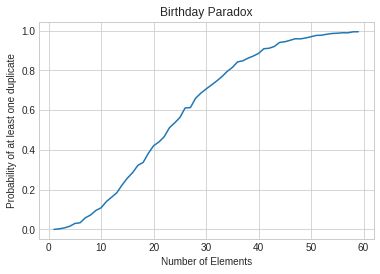

In [89]:
plt.plot(x,y)
plt.xlabel("Number of Elements")
plt.ylabel("Probability of at least one duplicate")
plt.title("Birthday Paradox")
plt.show()

In [95]:
# For plotting in Python you could start here:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

# For the Birthday problem
# https://en.wikipedia.org/wiki/Birthday_problem